In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')


In [13]:
import pandas as pd

df = pd.read_excel("glass.xlsx", sheet_name=1)
df.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [15]:
df.columns


Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [17]:
df.rename(columns={'Glass_Type': 'Type'}, inplace=True) 


In [19]:
df['Type'].value_counts()


Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [21]:
df.isnull().sum()


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [23]:
df.duplicated().sum()


1

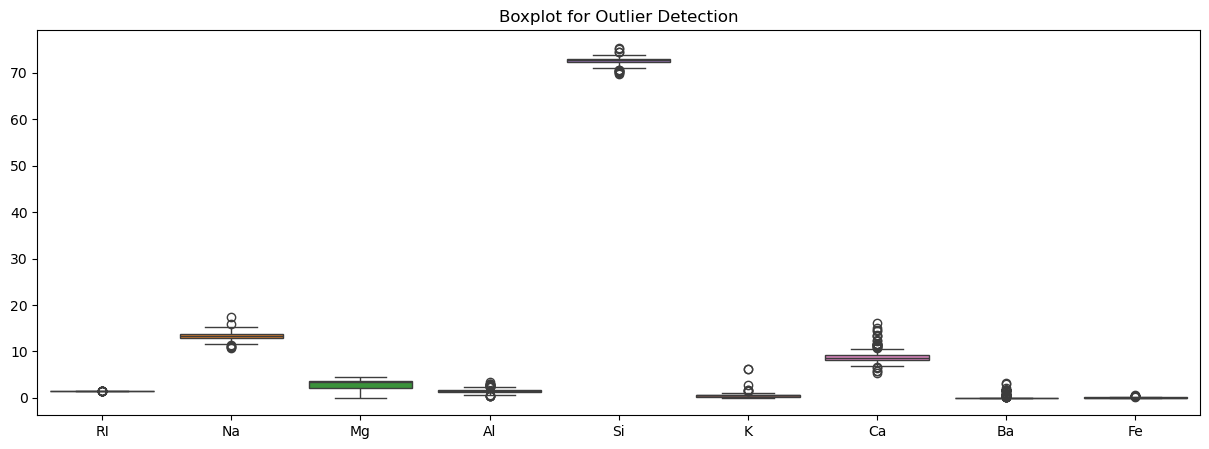

In [25]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df.drop('Type', axis=1))
plt.title("Boxplot for Outlier Detection")
plt.show()


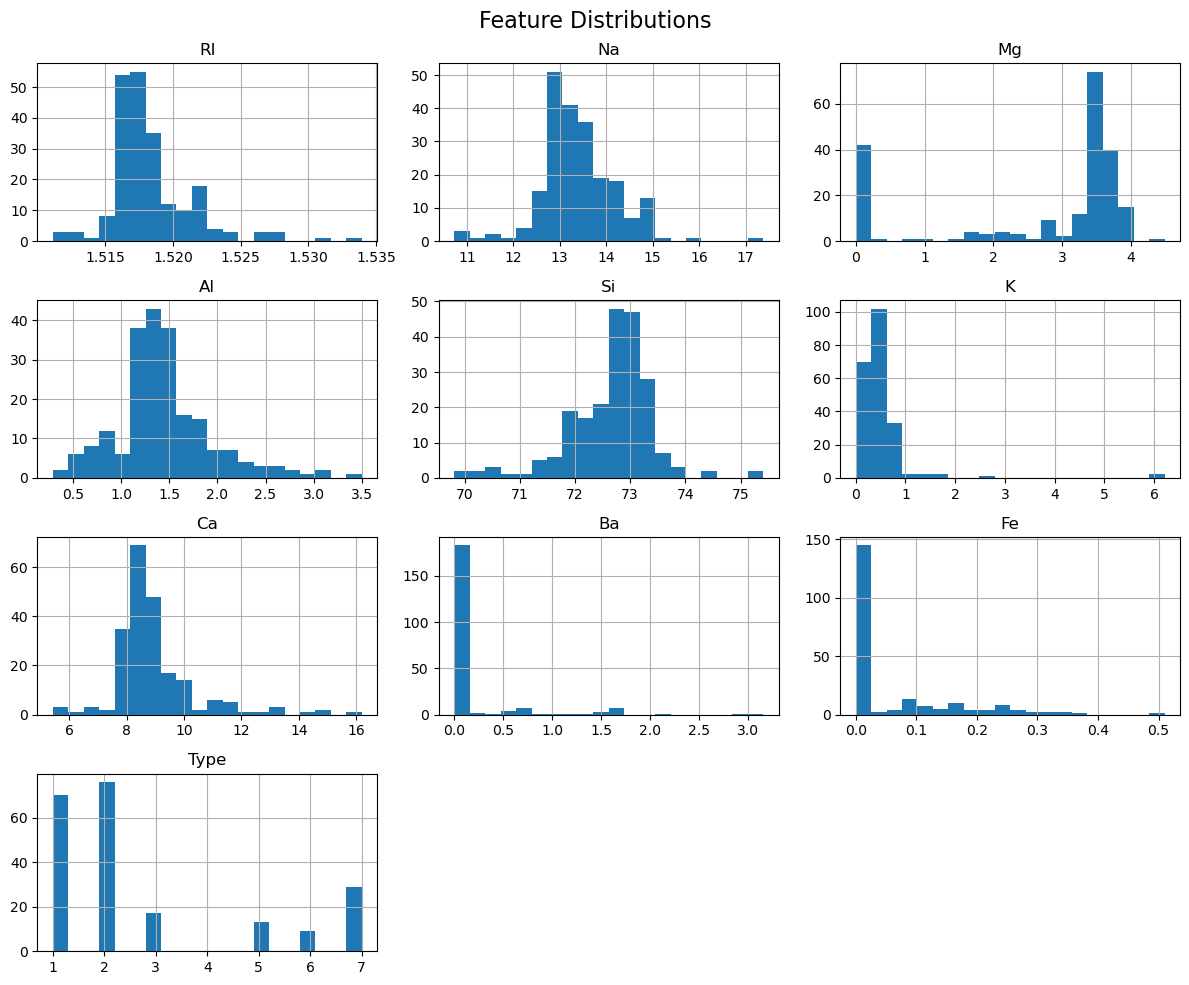

In [27]:
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


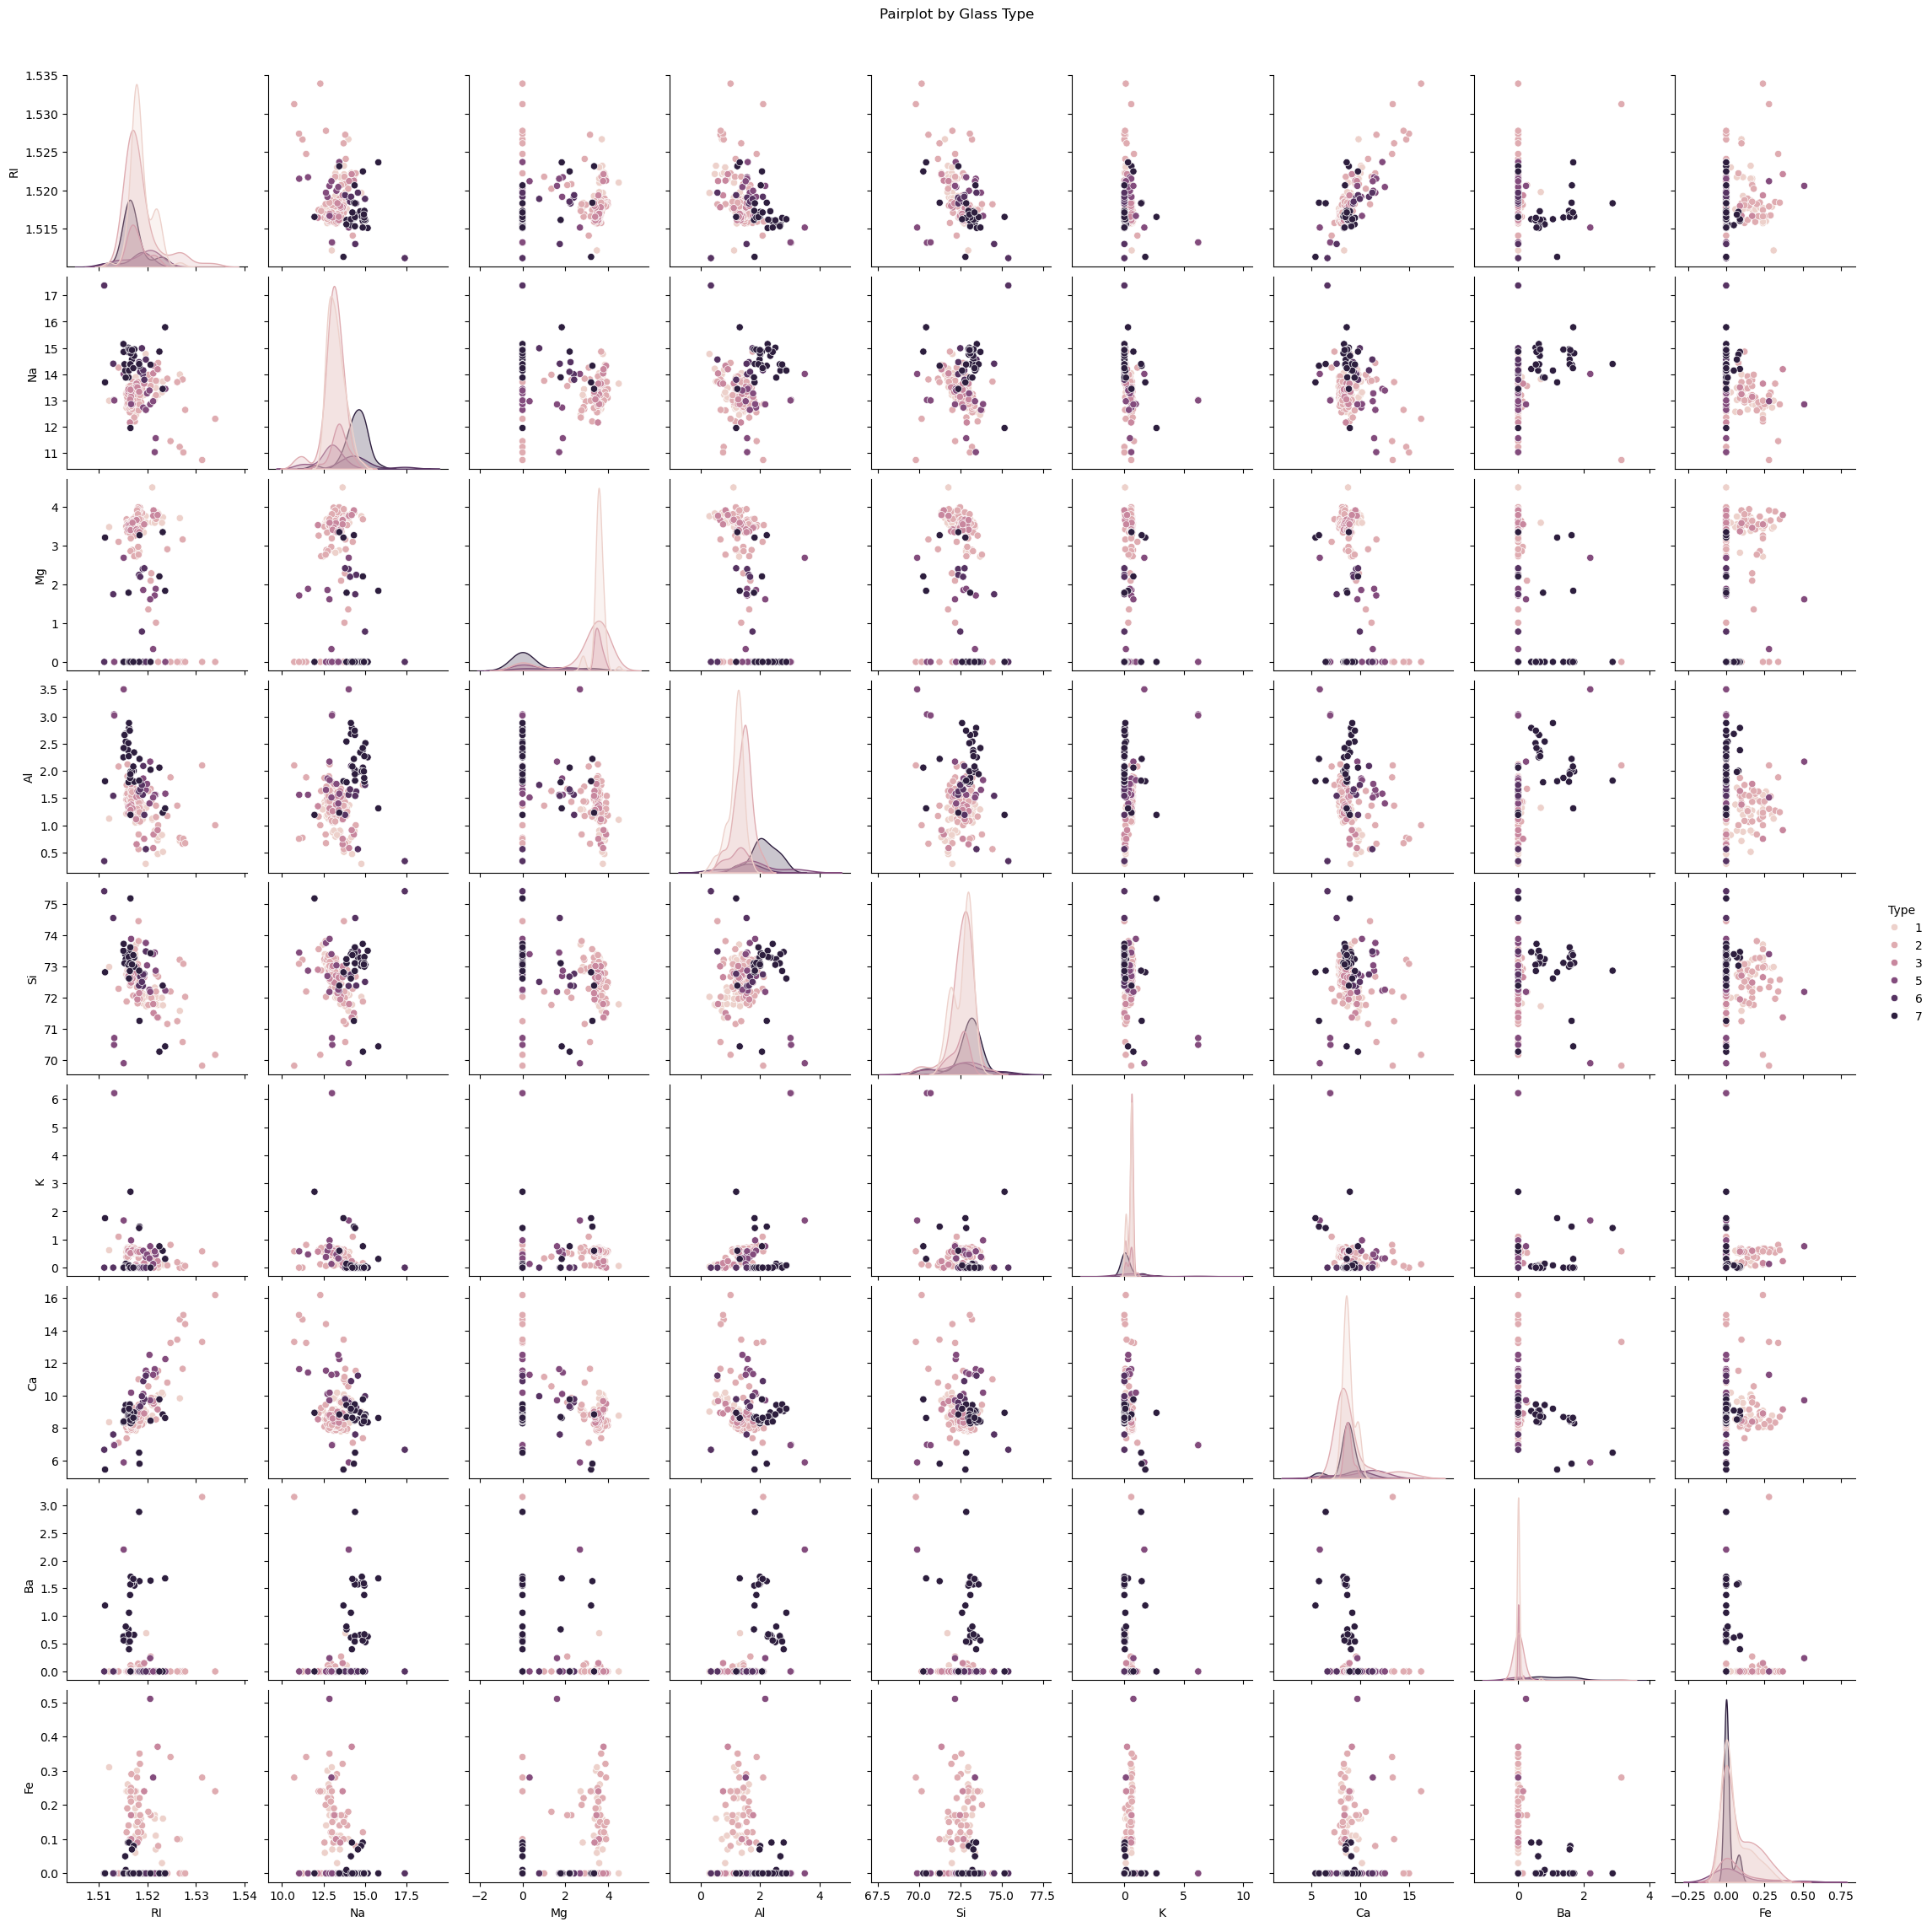

In [29]:
sns.pairplot(df, hue='Type')
plt.suptitle("Pairplot by Glass Type", y=1.02)
plt.show()


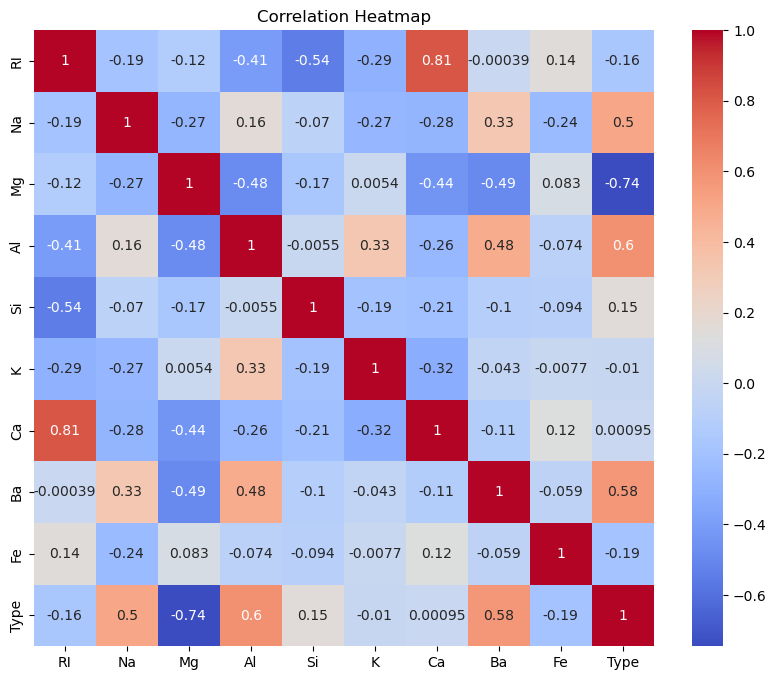

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [33]:
X = df.drop('Type', axis=1)
y = df['Type']


In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [37]:
y.value_counts()


Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [39]:
df_balanced = df.copy()

# Majority class
majority = df_balanced[df_balanced.Type == 1]

# Minority classes (excluding class 1)
minority_list = [df_balanced[df_balanced.Type == cls] for cls in df_balanced.Type.unique() if cls != 1]

# Upsample each minority class to match majority class
minority_upsampled = [resample(minority, replace=True, n_samples=len(majority), random_state=42)
                      for minority in minority_list]

# Combine majority with upsampled minority classes
df_balanced = pd.concat([majority] + minority_upsampled)

# Shuffle
df_balanced = df_balanced.sample(frac=1, random_state=42)

X = df_balanced.drop('Type', axis=1)
y = df_balanced['Type']
X_scaled = scaler.fit_transform(X)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [43]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [45]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score :", f1_score(y_true, y_pred, average='weighted'))
    print(classification_report(y_true, y_pred))

evaluate_model(y_test, y_pred_rf, "Random Forest")



--- Random Forest ---
Accuracy : 0.8928571428571429
Precision: 0.8972222222222224
Recall   : 0.8928571428571429
F1 Score : 0.8938992042440317
              precision    recall  f1-score   support

           1       0.67      0.71      0.69        14
           2       0.92      0.79      0.85        14
           3       0.80      0.86      0.83        14
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        14

    accuracy                           0.89        84
   macro avg       0.90      0.89      0.89        84
weighted avg       0.90      0.89      0.89        84



In [47]:
bag_model = BaggingClassifier(n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train)
y_pred_bag = bag_model.predict(X_test)

evaluate_model(y_test, y_pred_bag, "Bagging")



--- Bagging ---
Accuracy : 0.8928571428571429
Precision: 0.8972222222222224
Recall   : 0.8928571428571429
F1 Score : 0.8938992042440317
              precision    recall  f1-score   support

           1       0.67      0.71      0.69        14
           2       0.92      0.79      0.85        14
           3       0.80      0.86      0.83        14
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        14

    accuracy                           0.89        84
   macro avg       0.90      0.89      0.89        84
weighted avg       0.90      0.89      0.89        84



In [49]:
boost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
boost_model.fit(X_train, y_train)
y_pred_boost = boost_model.predict(X_test)

evaluate_model(y_test, y_pred_boost, "AdaBoost (Boosting)")



--- AdaBoost (Boosting) ---
Accuracy : 0.6547619047619048
Precision: 0.5081699346405228
Recall   : 0.6547619047619048
F1 Score : 0.5569444444444445
              precision    recall  f1-score   support

           1       0.38      0.93      0.54        14
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        14
           5       0.67      1.00      0.80        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        14

    accuracy                           0.65        84
   macro avg       0.51      0.65      0.56        84
weighted avg       0.51      0.65      0.56        84



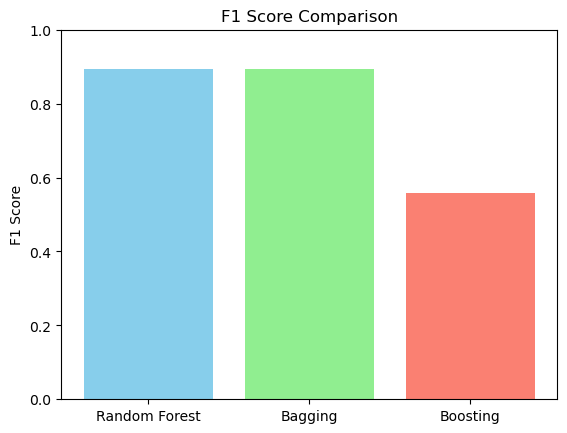

In [51]:
models = ['Random Forest', 'Bagging', 'Boosting']
scores = [
    f1_score(y_test, y_pred_rf, average='weighted'),
    f1_score(y_test, y_pred_bag, average='weighted'),
    f1_score(y_test, y_pred_boost, average='weighted')
]

plt.bar(models, scores, color=['skyblue', 'lightgreen', 'salmon'])
plt.title("F1 Score Comparison")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.show()


In [ ]:
# ### Bagging vs Boosting

# - **Bagging (Bootstrap Aggregating)**:
#   - Trains multiple models (usually the same type) in parallel.
#   - Each model gets a random subset of the training data (with replacement).
#   - Final prediction is by majority vote (classification) or average (regression).
#   - Reduces **variance**.
#   - Example: Random Forest.

# - **Boosting**:
#   - Trains models sequentially.
#   - Each new model focuses on errors made by the previous one.
#   - Final prediction is a weighted combination.
#   - Reduces **bias and variance**.
#   - Example: AdaBoost, Gradient Boosting.

# ###  Handling Imbalanced Data

# - Use **resampling techniques** (oversampling, undersampling).
# - Use **class weights** in classifiers.
# - Apply **SMOTE** (Synthetic Minority Oversampling Technique).
# - Evaluate with metrics like **precision, recall, F1-score**, not just accuracy.
